## Plots of all classification models: True vs Predicted values (all data)

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import yaml
import pprint
import matplotlib
import itertools
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from util import get_true_predicted_crossvalid, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
from xrsdkit.tools.profiler import profile_keys
from xrsdkit.tools.ymltools import read_local_dataset
from util import *

In [3]:
used_features = []

In [4]:
df, idx_df = read_local_dataset(['../xrsdkit_modeling/flowreactor_pd_nanoparticles/dataset', 
                                 '../xrsdkit_modeling/batch_pd_nanoparticles/dataset'], downsampling_distance=1) 

loading data from RxnA_20190329_9_dz_bgsub.yml
loading data from RxnA_20190329_10_dz_bgsub.yml
loading data from RxnA_20190329_8_dz_bgsub.yml
loading data from RxnA_20190329_11_dz_bgsub.yml
loading data from RxnA_20190329_5_dz_bgsub.yml
loading data from RxnA_20190329_2_dz_bgsub.yml
loading data from RxnA_20190329_3_dz_bgsub.yml
loading data from RxnA_20190329_4_dz_bgsub.yml
loading data from RxnA_20190329_6_dz_bgsub.yml
loading data from RxnA_20190329_1_dz_bgsub.yml
loading data from RxnA_20190329_0_dz_bgsub.yml
loading data from RxnA_20190329_7_dz_bgsub.yml
loading data from RxnA_20190329_14_dz_bgsub.yml
loading data from RxnA_20190329_13_dz_bgsub.yml
loading data from RxnA_20190329_12_dz_bgsub.yml
loading data from RxnA_20190329_15_dz_bgsub.yml
loading data from RxnD_201902_11_dz_bgsub.yml
loading data from RxnD_201902_16_dz_bgsub.yml
loading data from RxnD_201902_1_dz_bgsub.yml
loading data from RxnD_201902_6_dz_bgsub.yml
loading data from RxnD_201902_20_dz_bgsub.yml
loading data f

loading data from RxnE_201902_1_dz_bgsub.yml
loading data from RxnE_201902_22_dz_bgsub.yml
loading data from RxnE_201902_6_dz_bgsub.yml
loading data from RxnE_201902_14_dz_bgsub.yml
loading data from RxnE_201902_13_dz_bgsub.yml
loading data from RxnE_201902_23_dz_bgsub.yml
loading data from RxnE_201902_7_dz_bgsub.yml
loading data from RxnE_201902_24_dz_bgsub.yml
loading data from RxnE_201902_0_dz_bgsub.yml
loading data from RxnE_201902_12_dz_bgsub.yml
loading data from RxnE_201902_15_dz_bgsub.yml
loading data from RxnE_201902_18_dz_bgsub.yml
loading data from RxnE_201902_19_dz_bgsub.yml
loading data from RxnB_20190329_4_dz_bgsub.yml
loading data from RxnB_20190329_3_dz_bgsub.yml
loading data from RxnB_20190329_28_dz_bgsub.yml
loading data from RxnB_20190329_19_dz_bgsub.yml
loading data from RxnB_20190329_29_dz_bgsub.yml
loading data from RxnB_20190329_2_dz_bgsub.yml
loading data from RxnB_20190329_5_dz_bgsub.yml
loading data from RxnB_20190329_18_dz_bgsub.yml
loading data from RxnB_201

loading data from R7_SAXS_0042_dz_bgsub.yml
loading data from R7_SAXS_0017_dz_bgsub.yml
loading data from R7_SAXS_0048_dz_bgsub.yml
loading data from R7_SAXS_0008_dz_bgsub.yml
loading data from R7_SAXS_0039_dz_bgsub.yml
loading data from R7_SAXS_0009_dz_bgsub.yml
loading data from R7_SAXS_0049_dz_bgsub.yml
loading data from R7_SAXS_0038_dz_bgsub.yml
loading data from R7_SAXS_0059_dz_bgsub.yml
loading data from R7_SAXS_0019_dz_bgsub.yml
loading data from R7_SAXS_0028_dz_bgsub.yml
loading data from R7_SAXS_0068_dz_bgsub.yml
loading data from R7_SAXS_0018_dz_bgsub.yml
loading data from R7_SAXS_0058_dz_bgsub.yml
loading data from R7_SAXS_0069_dz_bgsub.yml
loading data from R7_SAXS_0029_dz_bgsub.yml
loading data from R7_SAXS_0024_dz_bgsub.yml
loading data from R7_SAXS_0071_dz_bgsub.yml
loading data from R7_SAXS_0023_dz_bgsub.yml
loading data from R7_SAXS_0036_dz_bgsub.yml
loading data from R7_SAXS_0063_dz_bgsub.yml
loading data from R7_SAXS_0031_dz_bgsub.yml
loading data from R7_SAXS_0064_d

loading data from C_266C_0212185440_0001_dz_bgsub.yml
loading data from C_cooling_190C_0212193433_0001_dz_bgsub.yml
loading data from C_60C_30min_0212184209_0002_dz_bgsub.yml
loading data from C_130C_0212184806_0001_dz_bgsub.yml
loading data from C_280C_14min_0212191519_0001_dz_bgsub.yml
loading data from C_280C_8min_0212190829_0001_dz_bgsub.yml
loading data from C_280C_3min_0212190329_0001_dz_bgsub.yml
loading data from C_255C_0212185316_0001_dz_bgsub.yml
loading data from C_230C_0212185157_0001_dz_bgsub.yml
loading data from C_280C_13min_0212191344_0001_dz_bgsub.yml
loading data from C_260C_0212185343_0001_dz_bgsub.yml
loading data from C_278C_0212185847_0001_dz_bgsub.yml
loading data from C_cooling_210C_0212193358_0001_dz_bgsub.yml
loading data from C_262C_0212185402_0001_dz_bgsub.yml
loading data from C_280C_6min_0212190628_0001_dz_bgsub.yml
loading data from C_60C_15min_0212182736_0001_dz_bgsub.yml
loading data from C_cooling_110C_0212193925_0001_dz_bgsub.yml
loading data from C_2

loading data from R5_1stcool_0074_dz_bgsub.yml
loading data from R5_1stcool_0034_dz_bgsub.yml
loading data from R5_1stcool_0061_dz_bgsub.yml
loading data from R5_1stcool2_0016_dz_bgsub.yml
loading data from R5_1stcool3_0002_dz_bgsub.yml
loading data from R5_1stcool_0033_dz_bgsub.yml
loading data from R5_1stcool_0066_dz_bgsub.yml
loading data from R5_SAXS_0059_dz_bgsub.yml
loading data from R5_1stcool2_0011_dz_bgsub.yml
loading data from R5_1stcool_0005_dz_bgsub.yml
loading data from R5_1stcool_0050_dz_bgsub.yml
loading data from R5_1stcool_0002_dz_bgsub.yml
loading data from R5_1stcool_0057_dz_bgsub.yml
loading data from R5_SAXS_0068_dz_bgsub.yml
loading data from R5_1stcool2_0020_dz_bgsub.yml
loading data from R5_1stcool_0017_dz_bgsub.yml
loading data from R5_1stcool_0042_dz_bgsub.yml
loading data from R5_SAXS_0028_dz_bgsub.yml
loading data from R5_1stcool_0010_dz_bgsub.yml
loading data from R5_1stcool_0045_dz_bgsub.yml
loading data from R5_1stcool2_0010_dz_bgsub.yml
loading data from

loading data from R1_reac_0068_dz_bgsub.yml
loading data from R1_3rdcool_0039_dz_bgsub.yml
loading data from R1_addOAC2_0010_dz_bgsub.yml
loading data from R1_addOAC3_0004_dz_bgsub.yml
loading data from R1_upto220C_0006_dz_bgsub.yml
loading data from R1_addOAC3_0003_dz_bgsub.yml
loading data from R1_upto220C_0001_dz_bgsub.yml
loading data from R1_reac_0018_dz_bgsub.yml
loading data from R1_3rdcool_0049_dz_bgsub.yml
loading data from R1_2rdcool_0007_dz_bgsub.yml
loading data from R1_1stcool_0008_dz_bgsub.yml
loading data from R1_addOAC2_0002_dz_bgsub.yml
loading data from R1_1stcool_1_0020_dz_bgsub.yml
loading data from R1_addOAC2_0005_dz_bgsub.yml
loading data from R1_3rdcool_0009_dz_bgsub.yml
loading data from R1_2rdcool_0012_dz_bgsub.yml
loading data from R1_reac_0058_dz_bgsub.yml
loading data from R1_2rdcool_0015_dz_bgsub.yml
loading data from R1_2rdheat_0028_dz_bgsub.yml
loading data from R1_1stcool_1_0016_dz_bgsub.yml
loading data from R1_1stcool_1_0011_dz_bgsub.yml
loading data f

loading data from R1_reac_0026_dz_bgsub.yml
loading data from R1_2rdheat_0004_dz_bgsub.yml
loading data from R1_3rdcool_0022_dz_bgsub.yml
loading data from R1_addOAC_0010_dz_bgsub.yml
loading data from R1_reac_0074_dz_bgsub.yml
loading data from R1_reac_0021_dz_bgsub.yml
loading data from R1_2rdheat_0003_dz_bgsub.yml
loading data from R1_3rdcool_0025_dz_bgsub.yml
loading data from R1_addOAC_0017_dz_bgsub.yml
loading data from R1_addOAC1_0015_dz_bgsub.yml
loading data from R1_addOAC1_0012_dz_bgsub.yml
loading data from R1_addOAC_0002_dz_bgsub.yml
loading data from R1_3rdcool_0030_dz_bgsub.yml
loading data from R1_2rdheat_0016_dz_bgsub.yml
loading data from R1_reac_0061_dz_bgsub.yml
loading data from R1_reac_0034_dz_bgsub.yml
loading data from R1_addOAC_0005_dz_bgsub.yml
loading data from R1_3rdcool_0037_dz_bgsub.yml
loading data from R1_2rdheat_0011_dz_bgsub.yml
loading data from R1_reac_0066_dz_bgsub.yml
loading data from R1_reac_0033_dz_bgsub.yml
loading data from R1_addOAC1_0007_dz_b

loading data from E_280C_20min_0213204848_0001_dz_bgsub.yml
loading data from E_276C_0213202621_0001_dz_bgsub.yml
loading data from E_280C_7min_0213203542_0001_dz_bgsub.yml
loading data from E_30C_0213193421_0001_dz_bgsub.yml
loading data from E_250C_0213202234_0001_dz_bgsub.yml
loading data from E_225C_0213202111_0001_dz_bgsub.yml
loading data from E_230C_0213202131_0001_dz_bgsub.yml
loading data from E_280C_11min_0213203949_0001_dz_bgsub.yml
loading data from E_190C_0213201943_0001_dz_bgsub.yml
loading data from E_268C_0213202420_0001_dz_bgsub.yml
loading data from E_270C_0213202445_0001_dz_bgsub.yml
loading data from E_200C_0213202008_0001_dz_bgsub.yml
loading data from E_280C_1.5min_0213203013_0001_dz_bgsub.yml
loading data from E_262C_0213202327_0001_dz_bgsub.yml
loading data from E_280C_6min_0213203442_0001_dz_bgsub.yml
loading data from E_130C_0213201749_0001_dz_bgsub.yml
loading data from E_280C_3min_0213203143_0001_dz_bgsub.yml
loading data from E_210C_0213202032_0001_dz_bgsub

loading data from R12cooling2rd_0049_dz_bgsub.yml
loading data from R12addOac_SAXS_0026_dz_bgsub.yml
loading data from R12_SAXS_0039_dz_bgsub.yml
loading data from R12addOac_SAXS_0004_dz_bgsub.yml
loading data from R12cooling2rd_0093_dz_bgsub.yml
loading data from R12addOac_SAXS_0003_dz_bgsub.yml
loading data from R12cooling2rd_0094_dz_bgsub.yml
loading data from R12cooling_heating_0056_dz_bgsub.yml
loading data from R12addOac_SAXS2_0003_dz_bgsub.yml
loading data from R12cooling_heating_0051_dz_bgsub.yml
loading data from R12addOac_SAXS2_0004_dz_bgsub.yml
loading data from R12cooling2rd_0081_dz_bgsub.yml
loading data from R12addOac_SAXS_0016_dz_bgsub.yml
loading data from R12cooling2rd_0079_dz_bgsub.yml
loading data from R12cooling2rd_0086_dz_bgsub.yml
loading data from R12addOac_SAXS_0011_dz_bgsub.yml
loading data from R12_SAXS_0048_dz_bgsub.yml
loading data from R12addOac_SAXS1_0009_dz_bgsub.yml
loading data from R12cooling_heating_0060_dz_bgsub.yml
loading data from R12addOac_SAXS_0

loading data from R6_SAXS1_0035_dz_bgsub.yml
loading data from R6_SAXS1_0056_dz_bgsub.yml
loading data from R6_SAXS1_0003_dz_bgsub.yml
loading data from R6_SAXS1_0051_dz_bgsub.yml
loading data from R6_SAXS1_0004_dz_bgsub.yml
loading data from R6_SAXS1_0044_dz_bgsub.yml
loading data from R6_SAXS1_0011_dz_bgsub.yml
loading data from R6_SAXS1_0043_dz_bgsub.yml
loading data from R6_SAXS1_0016_dz_bgsub.yml
loading data from R4_saxs_0005_dz_bgsub.yml
loading data from R4_saxs_0050_dz_bgsub.yml
loading data from R4_cool_0020_dz_bgsub.yml
loading data from R4_saxs_0002_dz_bgsub.yml
loading data from R4_saxs_0057_dz_bgsub.yml
loading data from R4_cool_0027_dz_bgsub.yml
loading data from R4_cool_0032_dz_bgsub.yml
loading data from R4_saxs_0017_dz_bgsub.yml
loading data from R4_saxs_0042_dz_bgsub.yml
loading data from R4_cool_0035_dz_bgsub.yml
loading data from R4_saxs_0010_dz_bgsub.yml
loading data from R4_saxs_0045_dz_bgsub.yml
loading data from R4_cool2_0001_dz_bgsub.yml
loading data from R4_c

loading data from B_240C_9min_0212160317_0001_dz_bgsub.yml
loading data from B_180C_0212154020_0001_dz_bgsub.yml
loading data from B_191C_0212154220_0001_dz_bgsub.yml
loading data from B_110C_0212153416_0001_dz_bgsub.yml
loading data from B_211C_0212154753_0001_dz_bgsub.yml
loading data from B_210C_0212154706_0001_dz_bgsub.yml
loading data from B_60C_5min_0212145928_0002_dz_bgsub.yml
loading data from B_208C_0212154619_0001_dz_bgsub.yml
loading data from B_186C_0212154127_0001_dz_bgsub.yml
loading data from B_195C_0212154302_0001_dz_bgsub.yml
loading data from B_120C_0212153457_0001_dz_bgsub.yml
loading data from B_170C_0212153917_0001_dz_bgsub.yml
loading data from B_205C_0212154525_0001_dz_bgsub.yml
loading data from B_184C_0212154103_0001_dz_bgsub.yml
loading data from B_60C_10min_0212150314_0001_dz_bgsub.yml
loading data from B_240C_8min_0212160219_0001_dz_bgsub.yml
loading data from B_235C_0212155149_0001_dz_bgsub.yml
loading data from B_140C_0212153635_0001_dz_bgsub.yml
loading d

loading data from R13_0037_dz_bgsub.yml
loading data from R13_0065_dz_bgsub.yml
loading data from R13_0030_dz_bgsub.yml
loading data from R13cooling_0015_dz_bgsub.yml
loading data from R13cooling_0012_dz_bgsub.yml
loading data from R13cooling_0007_dz_bgsub.yml
loading data from R13_0028_dz_bgsub.yml
loading data from R13cooling_0036_dz_bgsub.yml
loading data from R13_0019_dz_bgsub.yml
loading data from R13cooling_0031_dz_bgsub.yml
loading data from R13cooling_0024_dz_bgsub.yml
loading data from R13_0059_dz_bgsub.yml
loading data from R13cooling_0023_dz_bgsub.yml
loading data from R13cooling_0001_dz_bgsub.yml
loading data from R13_0029_dz_bgsub.yml
loading data from R13cooling_0006_dz_bgsub.yml
loading data from R13cooling_0013_dz_bgsub.yml
loading data from R13cooling_0014_dz_bgsub.yml
loading data from R13cooling_0022_dz_bgsub.yml
loading data from R13_0058_dz_bgsub.yml
loading data from R13cooling_0025_dz_bgsub.yml
loading data from R13cooling_0030_dz_bgsub.yml
loading data from R13_

loading data from R2_SAXS_0049_dz_bgsub.yml
loading data from R2_SAXS1_0013_dz_bgsub.yml
loading data from R2_SAXS1_0014_dz_bgsub.yml
loading data from R2_SAXS_0009_dz_bgsub.yml
loading data from R2_SAXS1_0001_dz_bgsub.yml
loading data from R2_SAXS1_0006_dz_bgsub.yml
loading data from R2_SAXS_0003_dz_bgsub.yml
loading data from R2_SAXS_0056_dz_bgsub.yml
loading data from R2_COOL_0026_dz_bgsub.yml
loading data from R2_SAXS_0004_dz_bgsub.yml
loading data from R2_SAXS_0051_dz_bgsub.yml
loading data from R2_COOL_0021_dz_bgsub.yml
loading data from R2_SAXS_0011_dz_bgsub.yml
loading data from R2_SAXS_0044_dz_bgsub.yml
loading data from R2_SAXS_0016_dz_bgsub.yml
loading data from R2_SAXS_0043_dz_bgsub.yml
loading data from R2_COOL_0005_dz_bgsub.yml
loading data from R2_SAXS_0020_dz_bgsub.yml
loading data from R2_COOL_0002_dz_bgsub.yml
loading data from R2_SAXS_0027_dz_bgsub.yml
loading data from R2_SAXS_0072_dz_bgsub.yml
loading data from R2_SAXS_0032_dz_bgsub.yml
loading data from R2_SAXS_00

Finished downsampling: kept 26/37
Downsampling data for group: ('R3_201611', 'disordered__crystalline')
Finished downsampling: kept 7/7
Downsampling data for group: ('R4_201611', 'crystalline')
Finished downsampling: kept 43/86
Downsampling data for group: ('R4_201611', 'diffuse')
Finished downsampling: kept 32/32
Downsampling data for group: ('R4_201611', 'diffuse__crystalline')
Finished downsampling: kept 1/1
Downsampling data for group: ('R4_201611', 'diffuse__diffuse')
Finished downsampling: kept 6/6
Downsampling data for group: ('R4_201611', 'diffuse__diffuse__crystalline')
Finished downsampling: kept 1/1
Downsampling data for group: ('R4_20190417', 'diffuse')
Finished downsampling: kept 2/2
Downsampling data for group: ('R4_20190417', 'diffuse__diffuse')
Finished downsampling: kept 8/8
Downsampling data for group: ('R4_20190417', 'diffuse__diffuse__disordered')
Finished downsampling: kept 1/1
Downsampling data for group: ('R5_201611', 'crystalline')
Finished downsampling: kept 14

Finished downsampling: kept 28/30
Downsampling data for group: ('RxnF_201602', 'disordered')
Finished downsampling: kept 14/14
Downsampling data for group: ('RxnG_201602', 'diffuse')
Finished downsampling: kept 22/26
Downsampling data for group: ('RxnG_201602', 'diffuse__diffuse')
Finished downsampling: kept 7/7
Downsampling data for group: ('RxnG_201602', 'diffuse__diffuse__crystalline')
Finished downsampling: kept 9/9
Downsampling data for group: ('RxnH_201602', 'diffuse')
Finished downsampling: kept 31/33
Downsampling data for group: ('RxnH_201602', 'diffuse__diffuse')
Finished downsampling: kept 5/5
Downsampling data for group: ('RxnH_201602', 'disordered')
Finished downsampling: kept 24/24


### Binary Classifiers

In [5]:
b_cls, f = get_true_xvalid_binary_cls(df)
used_features.extend(f)

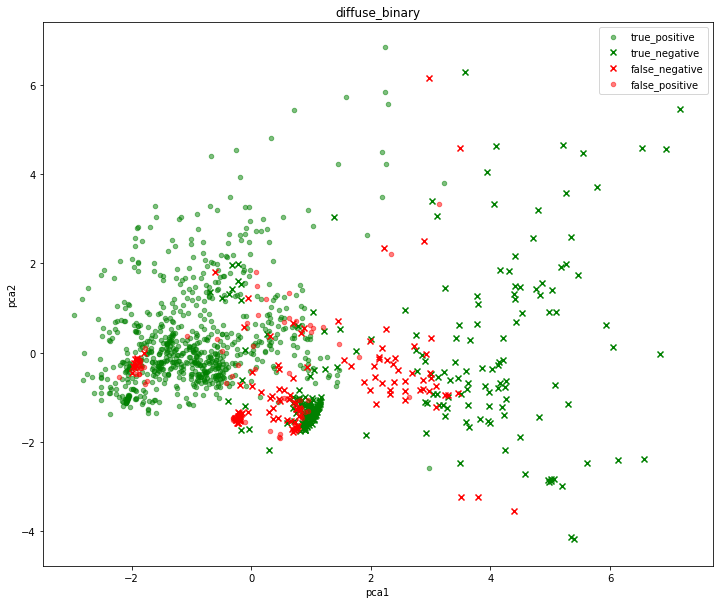

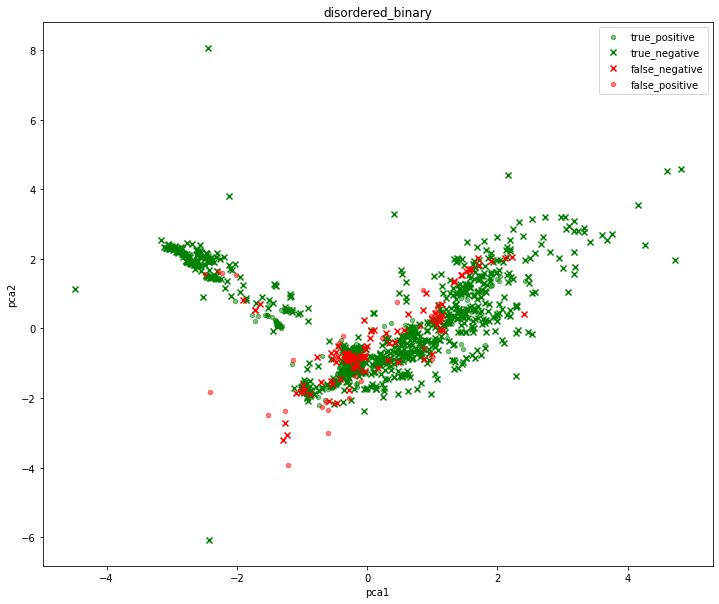

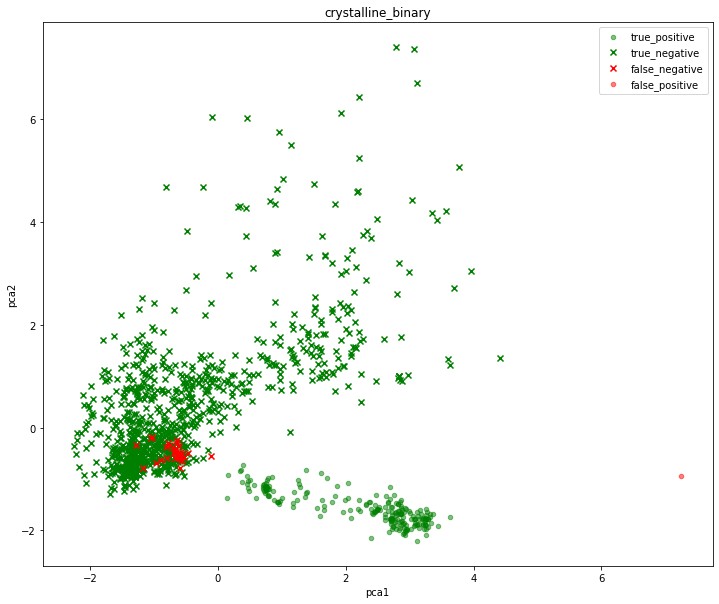

In [6]:
for k, v in b_cls.items():
    fig, ax = plt.subplots(1,1, figsize=(12,10))
    x = v['pca1']
    y = v['pca2']
    r = np.array(v['compared'])
    plt.scatter(x[r==0], y[r==0],marker='o', c='green',s= 20,alpha=.5)
    plt.scatter(x[r==1], y[r==1],marker='x', c='green')
    plt.scatter(x[r==2], y[r==2],marker='x', c='red')
    plt.scatter(x[r==3], y[r==3],marker='o', c='red',s= 20,alpha=.5)
    ax.set_title(k)
    ax.set_xlabel('pca1')
    ax.set_ylabel('pca2')
    ax.legend(["true_positive", 'true_negative', 'false_negative', 'false_positive'])
    fig_name = k + '.pdf'
    plt.savefig(fig_name)

### Multicalss Classifiers

In [7]:
m_cls, f = get_true_xvalid_multiclass_cls(df)
used_features.extend(f)

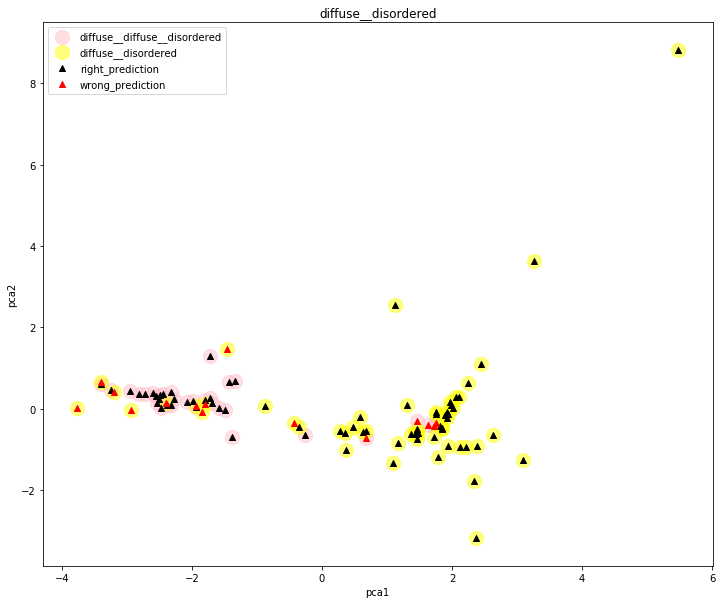

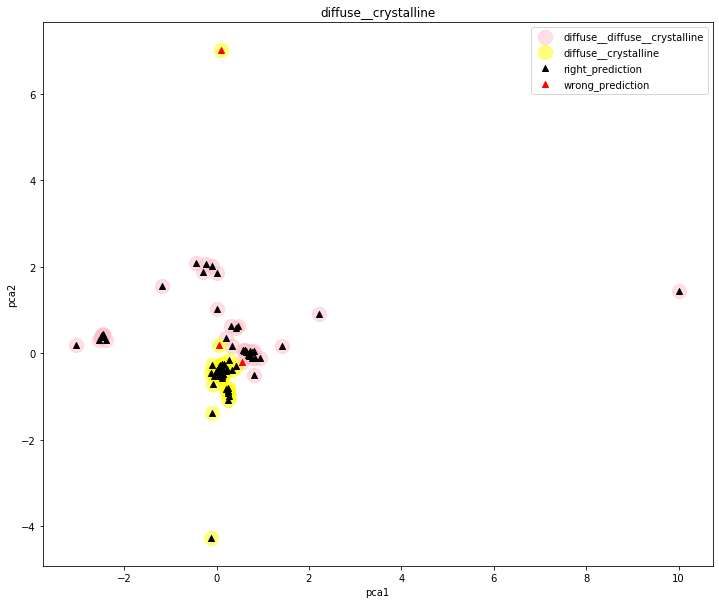

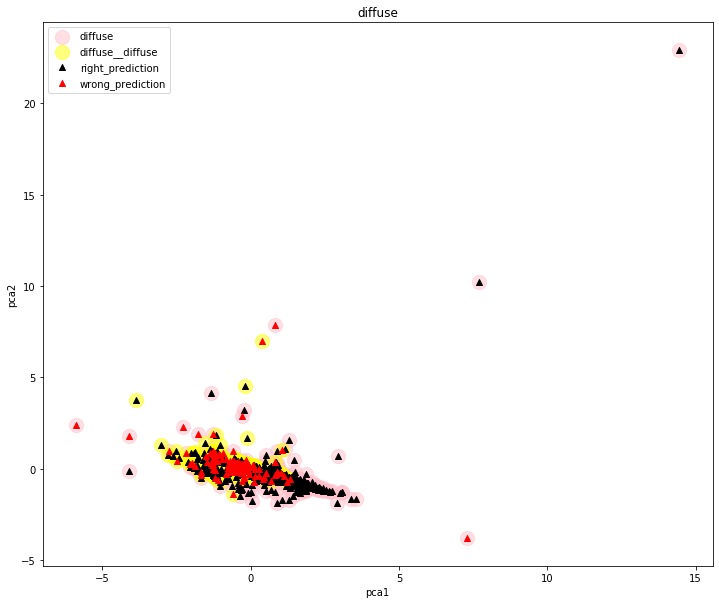

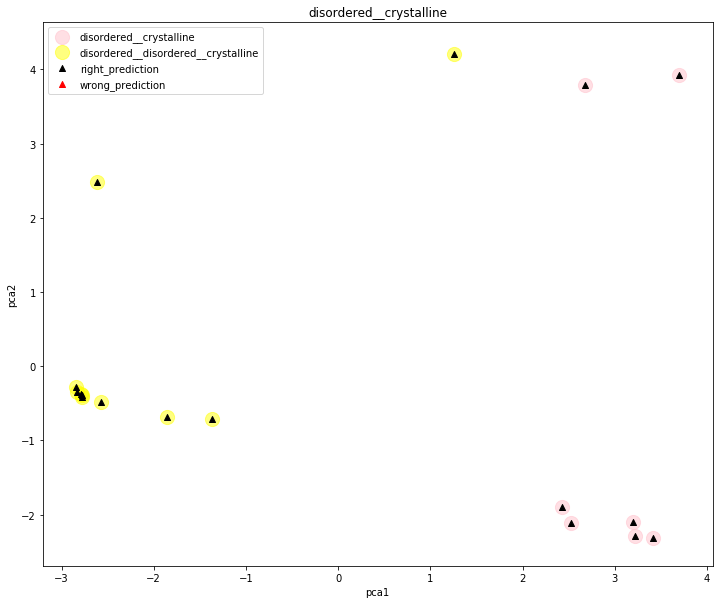

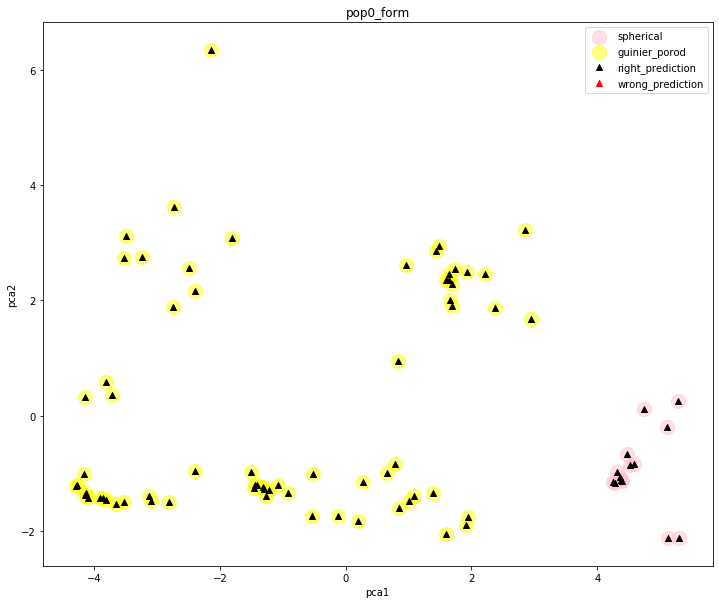

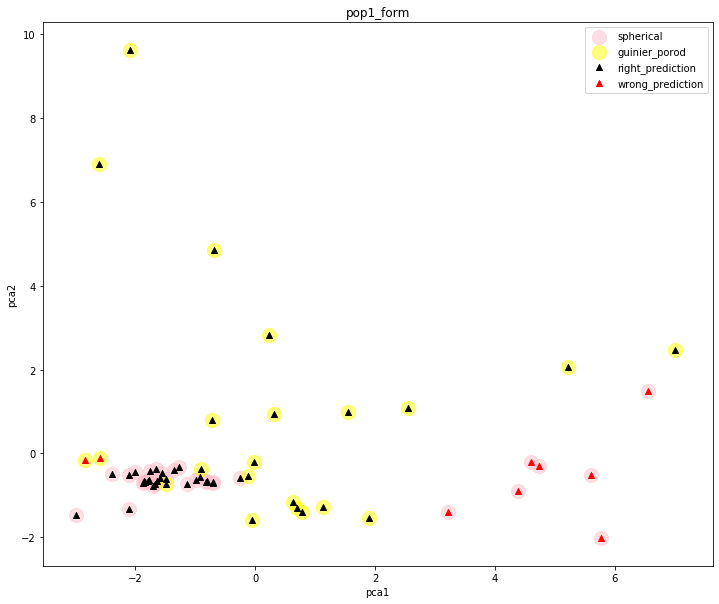

In [8]:
for k, v in m_cls.items():
    fig, ax = plt.subplots(1,1, figsize=(12,10))
    x = v['pca1']
    y = v['pca2']
    r = np.array(v['compared'])
    
    tr = np.array(v['true_y'])
    all_classes = set(v['true_y'])
    class_map = {}
    i = 0
    for c in all_classes:
        class_map[c] = i
        i+=1
        
    colors = ['pink', 'yellow', 'blue']
    
    for k2, v2 in class_map.items():
        ax.scatter(x[tr==k2],y[tr==k2], c=colors[v2],alpha=.5, label=k2, s= 200)
    plt.scatter(x[r==0], y[r==0],marker='^', label='right_prediction', c='black')
    plt.scatter(x[r==1], y[r==1],marker='^', label= 'wrong_prediction', c='red')
    
    
    ax.set_title(k)
    ax.set_xlabel('pca1')
    ax.set_ylabel('pca2')
    #ax.legend(["right_predictions", 'wrong_predictions'])
    ax.legend()
    fig_name = k + '.pdf'
    plt.savefig(fig_name)

### Right vs Wrong predictions for the combination of system class and form factors.

In [9]:
data_ind1 = pandas.read_csv("../xrsdkit_modeling/batch_pd_nanoparticles/dataset/dataset_index.csv")
data_ind1 = data_ind1.dropna(subset=['experiment_id'])
data_ind2 = pandas.read_csv("../xrsdkit_modeling/flowreactor_pd_nanoparticles/dataset/dataset_index.csv")
data_ind2 = data_ind2.dropna(subset=['experiment_id'])

In [10]:
data_ind1['dataset'] = 'batch_pd_nanoparticles'
data_ind2['dataset'] = 'flowreactor_pd_nanoparticles'
data_ind = pandas.concat([data_ind1,data_ind2])

In [11]:
data = pandas.read_csv("../xrsdkit_modeling/models_all_data/main_classifier_results.csv")
data = pandas.merge(data, data_ind, on='sample_id')

In [18]:
form_factor = []
form_factor_pr = []
right_pred_ff = []

for index, row in data.iterrows():
    sys_cl_predicted = row['system_class_xval']
    exp = row['experiment_id_x']
    dat_file_name = row['data_file']
    yml_file_name = row['yml_file']
    dataset = row['dataset']
    yml_path = '../xrsdkit_modeling/' + dataset +'/dataset/' + exp + '/' + yml_file_name
    with open(yml_path, 'r') as stream:
        data_loaded = yaml.safe_load(stream)
    features = data_loaded['features']
    f = open('../xrsdkit_modeling/' + dataset +'/dataset/' + exp + '/' + dat_file_name,'r')
    q_I = np.loadtxt(f,dtype=float)
    pred = predict(features, sys_cl_predicted)
    sys_est = system_from_prediction(pred,q_I[: , 0],q_I[ :, 1],
            features = features,
            sample_metadata = data_loaded['sample_metadata'],
            fit_report = data_loaded['fit_report'])
    
    if q_I.shape[1] > 2:
        dI = q_I[:,2]
    else:
        dI = None
    
    all_true_pops = row['system_class'].split("__")
    all_true_forms = dict.fromkeys(all_true_pops)
    for k, v in all_true_forms.items():
        all_true_forms[k] = set()
        for k2, v2 in data_loaded.items():
            if 'structure' in v2 and v2['structure'] == k:
                all_true_forms[k].add(v2['form'])
    form_factor.append(all_true_forms)    
    
    all_pr_pops = row['system_class_xval'].split("__")
    all_pr_forms = dict.fromkeys(all_pr_pops)
    for k, v in all_pr_forms.items():
        all_pr_forms[k] = set()
        for k2, v2 in sys_est.to_dict().items():
            if 'structure' in v2 and v2['structure'] == k:
                all_pr_forms[k].add(v2['form'])
    form_factor_pr.append(all_pr_forms)
    
    # compare predicted and real set form factors:
    result = True
    if len(all_pr_forms)!= len(all_true_forms):
        result = False
    else:
        if set(all_pr_forms.keys())!= set(all_true_forms.keys()):
            result = False
        else:
            for k, v in all_true_forms.items():
                if v != all_pr_forms[k]:
                    result = False
    right_pred_ff.append(result)

In [19]:
data['form_factor'] = form_factor
data['form_factor_pr'] = form_factor_pr
data['right_pred_ff'] = right_pred_ff

In [20]:
data.to_csv("data_with_ff.csv")

In [21]:
data = pandas.read_csv("data_with_ff.csv")

In [22]:
data['right_pred_sys_cl'] = data['system_class'] == data['system_class_xval']

In [23]:
data = data.merge(df, left_on='sample_id', right_on='sample_id')

In [24]:
used_features = set(used_features)

scaler = StandardScaler()
scaler.fit(data[used_features])
scaled_data = scaler.transform(data[used_features])

In [25]:
len(set(used_features))

21

In [26]:
data['right_pred_sc_ff'] = data['right_pred_sys_cl']&data['right_pred_ff']

In [27]:
pca = doPCA(scaled_data,2)
transformed_data = pca.transform(scaled_data)
data['pca1'] = transformed_data[ : , 0]
data['pca2'] = transformed_data[ : , 1]

In [28]:
def find_sph_pops(x):
    if 'diffuse' in x and 'spherical'in x:
            return 1
    else:
        return 0
       
data['diff_shp_included'] = data.form_factor.apply(find_sph_pops)

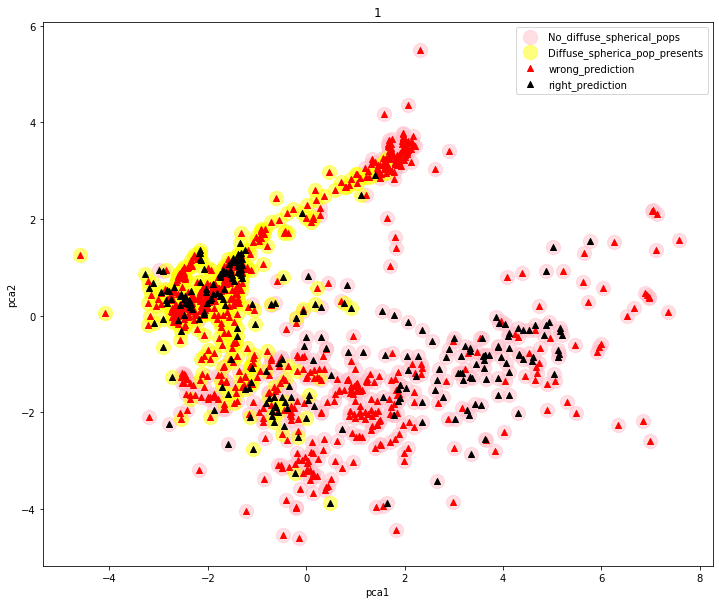

In [30]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
x = data['pca1']
y = data['pca2']
r = np.array(data['right_pred_sc_ff'])
tr = np.array(data['diff_shp_included'])
    
all_classes = set(data['diff_shp_included'])
class_map = {}
i = 0
for c in all_classes:
    class_map[i] = c
    i+=1
    
labels = {1: 'Diffuse_spherica_pop_presents', 0: "No_diffuse_spherical_pops"}
        
colors = ['pink', 'yellow', 'blue']
    
for k in all_classes:
    ax.scatter(x[tr==k],y[tr==k], c=colors[k],alpha=.5, label=labels[k], s= 200)
plt.scatter(x[r==1], y[r==1],marker='^', label= 'wrong_prediction', c='red')
plt.scatter(x[r==0], y[r==0],marker='^', label='right_prediction', c='black')

    
ax.set_title(k)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.legend()
fig_name = 'systme_class_and_ff.pdf'
plt.savefig(fig_name)